In [2]:
import pandas as pd 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from collections import Counter
import seaborn as sns


In [3]:
df = pd.read_csv('data/oi1ffu6lBXE_clean.csv')
df.head()

,author,text,likes,clean_text
0,@CollegeWallahbyPW,📗 Enroll Now in Decode Batches and become JOB ...,10,greenbook enroll decode batches become job rea...
1,@mobrurahmed-ts8ht4ry3r,Mazaa aagaya🎉,0,mazaa aagaya partypopper
2,@79SAMYAK_MAHUDWALEBORKAR,C bahut bada hai,0,c bada hai
3,@Mdsaif-d5x,❤❤❤😊,0,redheart redheart redheart smilingfacewithsmil...
4,@Mdsaif-d5x,Nice session ❤,0,nice session redheart


In [4]:
len(df)

300

In [5]:
# 1. Basic stats
print("Total comments:", len(df))
df["length"] = df["clean_text"].astype(str).apply(len)
print("Average length:", df["length"].mean())

Total comments: 300
Average length: 40.54333333333334


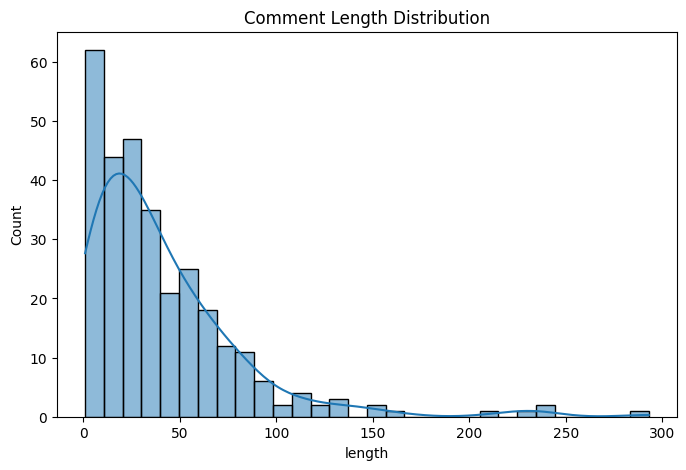

In [6]:
# 2. Comment length distribution
plt.figure(figsize=(8,5))
sns.histplot(df["length"], bins=30, kde=True)
plt.title("Comment Length Distribution")
plt.show()

In [7]:
# 3. WordCloud
text = " ".join(df["clean_text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

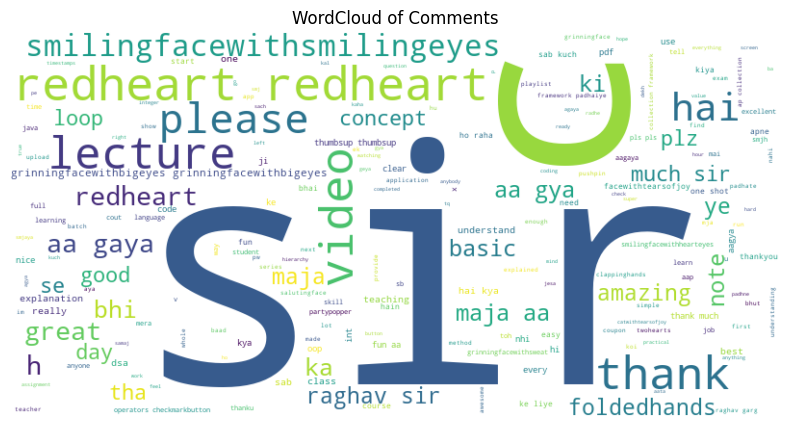

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Comments")
plt.show()

In [9]:
# 4. Top 20 most common words
from collections import Counter

In [10]:
words = " ".join(df["clean_text"].dropna()).split()
common_words = Counter(words).most_common(20)
common_words


[('sir', 118),
 ('redheart', 79),
 ('c', 47),
 ('hai', 28),
 ('aa', 28),
 ('video', 27),
 ('lecture', 25),
 ('please', 25),
 ('thank', 23),
 ('maja', 19),
 ('smilingfacewithsmilingeyes', 17),
 ('gaya', 14),
 ('kya', 13),
 ('thanks', 13),
 ('h', 13),
 ('great', 13),
 ('sab', 12),
 ('much', 12),
 ('thumbsup', 12),
 ('one', 12)]

In [11]:
words_df = pd.DataFrame(common_words, columns=["word", "count"])
words_df

,word,count
0,sir,118
1,redheart,79
2,c,47
3,hai,28
4,aa,28
5,video,27
6,lecture,25
7,please,25
8,thank,23
9,maja,19


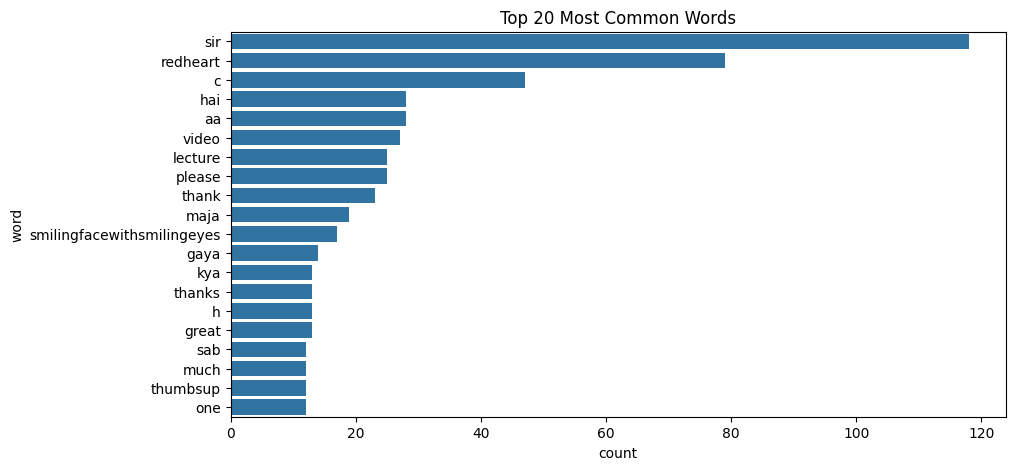

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=words_df, x="count", y="word")
plt.title("Top 20 Most Common Words")
plt.show()